# Trading Strategies powered by Machine Learning - Support Vector Regression

## Importing the library

In [65]:
import sys
sys.path.append('../../')

In [66]:
from util.load_data import *
from config.constants import *
pd.options.mode.chained_assignment = None  # default=

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
plt.style.use('fivethirtyeight')

## Download Data

In [68]:
XAUUSD = load_data()

In [69]:
XAUUSD['D1']

,Open,High,Low,Close,Volume
Time,,,,,
2007-01-01,635.679,637.103,635.006,635.943,604
2007-01-02,635.791,640.802,635.286,639.143,1282
2007-01-03,639.029,644.663,624.634,626.602,1302
2007-01-04,626.699,630.352,619.600,622.533,1365
2007-01-05,622.268,625.768,601.591,606.841,1284
...,...,...,...,...,...
2023-03-06,1852.255,1858.168,1845.015,1846.255,1380
2023-03-07,1846.225,1851.555,1812.655,1813.865,1380
2023-03-08,1813.855,1824.185,1809.248,1815.175,1379


## Model Building

### Split into train and test set, separate the label

In [70]:
future_days = 1

In [71]:
df = XAUUSD['D1']

In [72]:
df[str(future_days) + '_Day_Price_Forecast'] = df['Close'].shift(-future_days)

In [73]:
df

,Open,High,Low,Close,Volume,1_Day_Price_Forecast
Time,,,,,,
2007-01-01,635.679,637.103,635.006,635.943,604,639.143
2007-01-02,635.791,640.802,635.286,639.143,1282,626.602
2007-01-03,639.029,644.663,624.634,626.602,1302,622.533
2007-01-04,626.699,630.352,619.600,622.533,1365,606.841
2007-01-05,622.268,625.768,601.591,606.841,1284,607.867
...,...,...,...,...,...,...
2023-03-06,1852.255,1858.168,1845.015,1846.255,1380,1813.865
2023-03-07,1846.225,1851.555,1812.655,1813.865,1380,1815.175
2023-03-08,1813.855,1824.185,1809.248,1815.175,1379,1831.415


In [74]:
x = np.array(df[['Close']])
x

array([[ 635.943],
       [ 639.143],
       [ 626.602],
       ...,
       [1815.175],
       [1831.415],
       [1864.098]])

In [75]:
x = x[:df.shape[0] - future_days]
x

array([[ 635.943],
       [ 639.143],
       [ 626.602],
       ...,
       [1813.865],
       [1815.175],
       [1831.415]])

In [76]:
y = np.array(df[str(future_days) + '_Day_Price_Forecast'])
y = y[:-future_days]
y

array([ 639.143,  626.602,  622.533, ..., 1815.175, 1831.415, 1864.098])

In [77]:
from sklearn.model_selection import train_test_split

# Split into train and test set
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size= 0.2)

In [78]:
svr_rbf = SVR(kernel='rbf' , C=1e3, gamma=0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [79]:
svr_rbf_confidence = svr_rbf.score(x_test, y_test)
print('svr_rbf accurac:', svr_rbf_confidence)

svr_rbf accurac: 0.9984365634517564


In [80]:
svr_prediction = svr_rbf.predict(x_test)
svr_prediction

array([ 877.42046488, 1865.5546863 , 1228.92630634, ..., 1501.43232287,
       1396.61418377,  856.49197362])

In [81]:
y_test

array([ 867.662, 1865.438, 1230.771, ..., 1512.025, 1387.026,  841.17 ])

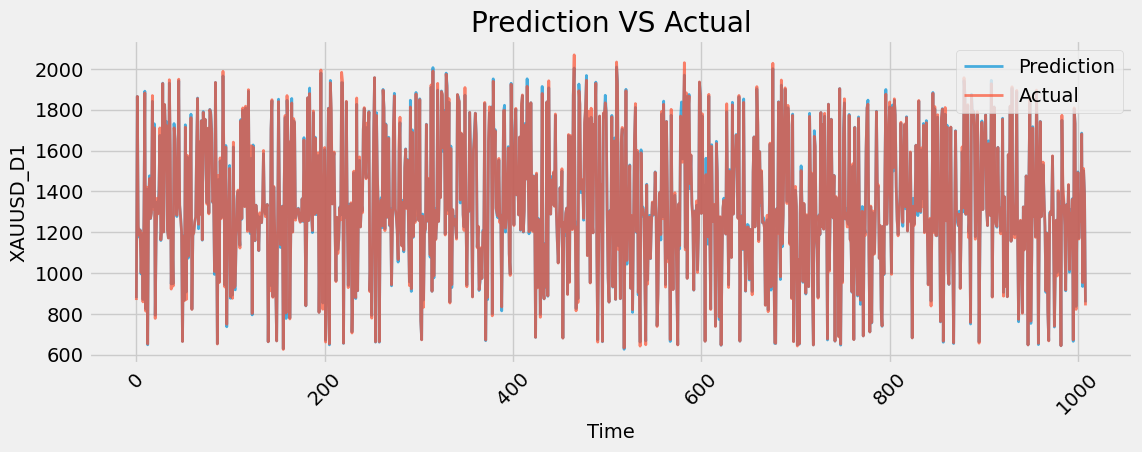

In [82]:
plt.figure(figsize=(12,4))
plt.plot(svr_prediction, label='Prediction' , lw=2, alpha=.7)
plt.plot(y_test, label='Actual', lw=2 , alpha=.7 )
plt.title('Prediction VS Actual')
plt.ylabel('XAUUSD_D1')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()